In [3]:
# 라이브러리 호출
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from functools import reduce
from datetime import datetime, timezone
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# 경고 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 한글 출력
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

### 데이터 로드

In [4]:
path1 = os.path.join(os.path.split(os.getcwd())[0], "data\\reduction_data\\*.csv")
path2 = os.path.join(os.path.split(os.getcwd())[0], "data\\summoner\\*.csv")
path3 = os.path.join(os.path.split(os.getcwd())[0], "data\\champion\\*_comprehensive.csv")
file_path1 = glob(path1)
file_path2 = glob(path2)
file_path3 = glob(path3)

player_info_data = pd.concat([pd.read_csv(file, encoding="utf-8") for file in file_path1], axis=0)
summoner_data = pd.concat([pd.read_csv(file, encoding="utf-8") for file in file_path2], axis=0)
champion_mastery_data = pd.concat([pd.read_csv(file, encoding="utf-8") for file in file_path3], axis=0)

display(player_info_data.head(3))
print(f"Player information data count : {len(player_info_data.index)}")
display(summoner_data.head(3))
print(f"Summoner data count : {len(summoner_data.index)}")
display(champion_mastery_data.head(3))
print(f"Champion mastery data count : {len(champion_mastery_data.index)}")

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
0,94da69b5-9744-4031-bf16-917e68722f6d,RANKED_SOLO_5x5,BRONZE,I,CL-MWfColtulz89D80YG9fwTkoNyEyEv4uLTJT1iIv4rVTk,uc0urX5w8IlvaETcbZnQjMefQzXw5cZNSOOM54qGn9sK3-...,25,24,16,False,False,False,False
1,356a6509-c501-449b-8dbf-dff17c76801d,RANKED_SOLO_5x5,BRONZE,I,GWpNIl1GHC_Tz-A5fqaxPm9rbFiHMeTIFEPlzqbdWP-eMQ...,xAZGvtlHKv0FghgZQOwhEClT7TKWAIU1MTPS-OWv-Hx3uK...,51,4,1,False,False,False,True
2,410b6c38-1a8f-4d38-883a-54fddfb53873,RANKED_SOLO_5x5,BRONZE,I,ibPlB3MK2kMuMp-aVRf3eQ3mwSNdWJb5dH4ckr2hRmGZ33k,_2p9MavMeQ91PkjjHjd_a8NBlEa9St2iH-IkXqyPVBqZDx...,41,8,10,False,False,False,True


Player information data count : 231930


,id,accountId,puuid,profileIconId,revisionDate,summonerLevel
0,CL-MWfColtulz89D80YG9fwTkoNyEyEv4uLTJT1iIv4rVTk,jO8qWw6PeEyoDlo7laPhy_gCB9PEGB6ZRuc-rNVH0mdObe...,uc0urX5w8IlvaETcbZnQjMefQzXw5cZNSOOM54qGn9sK3-...,4832,1743066171249,123
1,GWpNIl1GHC_Tz-A5fqaxPm9rbFiHMeTIFEPlzqbdWP-eMQ...,m-63Zg6x6upKZQD6GLFgLpckxHS1zZ4lETJ4EsOZZGSjFh...,xAZGvtlHKv0FghgZQOwhEClT7TKWAIU1MTPS-OWv-Hx3uK...,6727,1742882526000,82
2,ibPlB3MK2kMuMp-aVRf3eQ3mwSNdWJb5dH4ckr2hRmGZ33k,2haKR57rTVUmQHfHZ__ht5bq8ShBz3VXlSms_Ty8_jcRyBg,_2p9MavMeQ91PkjjHjd_a8NBlEa9St2iH-IkXqyPVBqZDx...,1385,1742657779000,60


Summoner data count : 231930


,puuid,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,markRequiredForNextLevel,tokensEarned,championSeasonMilestone,milestoneGrades,nextSeasonMilestone
0,0bBjdC_ZBO7DCs89jtoUbMMTrdAhF_LZQU42Dv5zWNJVSw...,526,69,786824,1743311515000,62224,-51224,2,1,7,"['B-', 'C-', 'B']","{'requireGradeCounts': {'S-': 2}, 'rewardMarks..."
1,0bBjdC_ZBO7DCs89jtoUbMMTrdAhF_LZQU42Dv5zWNJVSw...,497,50,577681,1743186016000,62081,-51081,2,0,3,['B+'],"{'requireGradeCounts': {'S-': 1}, 'rewardMarks..."
2,0bBjdC_ZBO7DCs89jtoUbMMTrdAhF_LZQU42Dv5zWNJVSw...,12,26,288769,1743230946000,37169,-26169,2,0,2,"['D+', 'B+', 'B-']","{'requireGradeCounts': {'S-': 1}, 'rewardMarks..."


Champion mastery data count : 695703


In [5]:
data = reduce(lambda x, y: pd.merge(x, y, how="outer", on="puuid"), [player_info_data, summoner_data, champion_mastery_data])
data.head()

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,...,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,markRequiredForNextLevel,tokensEarned,championSeasonMilestone,milestoneGrades,nextSeasonMilestone
0,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,...,5,29339,1737285580000,7739,2261,1,2,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks..."
1,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,...,5,28572,1737291680000,6972,3028,1,5,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks..."
2,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,...,5,24741,1733908210000,3141,6859,1,5,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks..."
3,a3447854-f238-4f2d-9be0-86c6d58166e0,RANKED_SOLO_5x5,DIAMOND,IV,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,---SB99NOn2_2F_LfWf_XGvf4MHjKhh4ldbP3vNGSl6uUw...,0,30,22,False,...,20,196312,1740245056000,10712,288,2,6,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks..."
4,a3447854-f238-4f2d-9be0-86c6d58166e0,RANKED_SOLO_5x5,DIAMOND,IV,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,---SB99NOn2_2F_LfWf_XGvf4MHjKhh4ldbP3vNGSl6uUw...,0,30,22,False,...,20,190530,1741602282000,4930,6070,2,3,1,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks..."


### 티어별 유저 분포

In [6]:
path = os.path.join(os.path.split(os.getcwd())[0], "data\\player_info\\*.csv")
file_path = glob(path)

original_data = pd.concat([pd.read_csv(file, encoding="utf-8") for file in file_path], axis=0)
vc = original_data["tier"].value_counts()
vc

tier
BRONZE         455927
SILVER         449923
IRON           445037
GOLD           414402
PLATINUM       279447
EMERALD        199202
DIAMOND         64347
MASTER          10000
GRANDMASTER       700
CHALLENGER        300
Name: count, dtype: int64

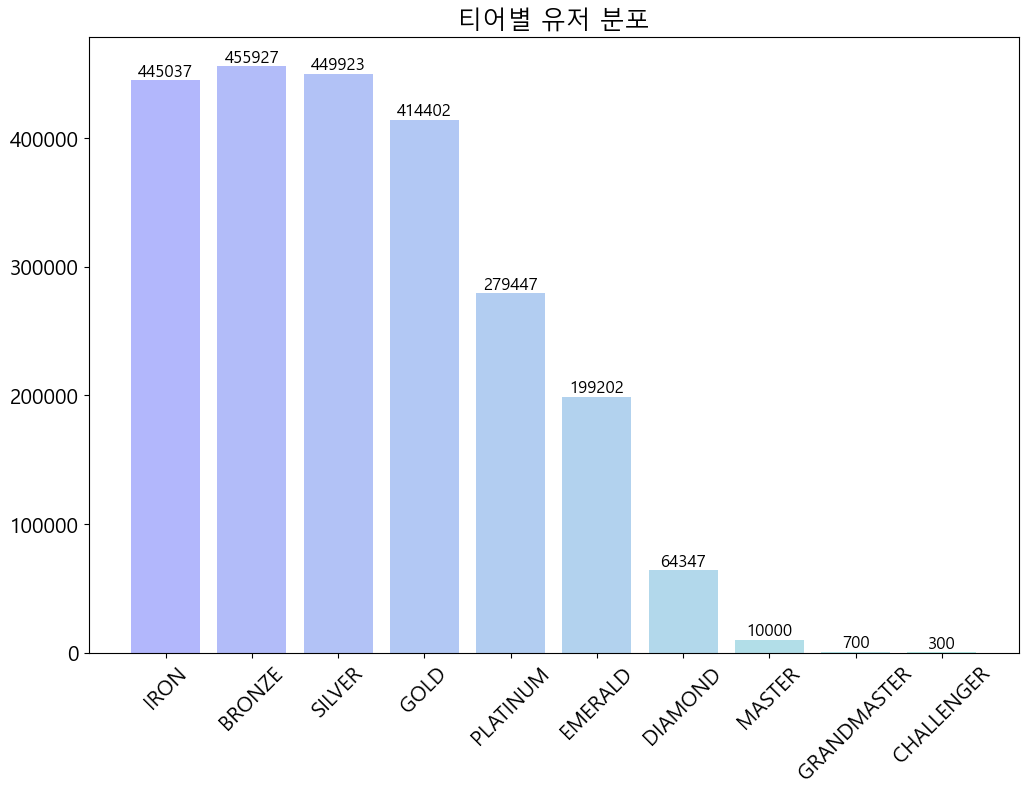

In [7]:
tiers = ["IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "EMERALD", "DIAMOND", "MASTER", "GRANDMASTER", "CHALLENGER"]
height = [len(original_data[original_data["tier"] == tier].index) for tier in tiers]
colors = sns.color_palette('winter', len(original_data.columns))

plt.figure(figsize=(12, 8))
bar = plt.bar(x=tiers, height=height, color=colors, alpha=0.3)
plt.xticks(tiers, rotation=45)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12)
plt.title("티어별 유저 분포")
plt.show()

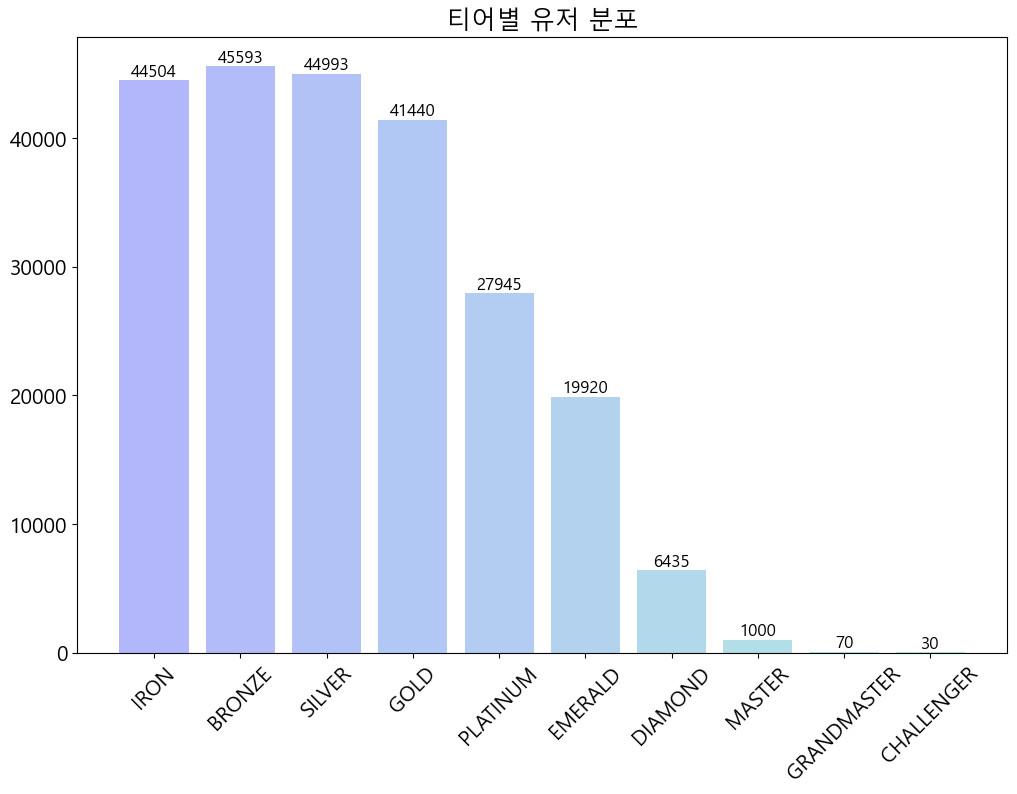

In [8]:
tiers = ["IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "EMERALD", "DIAMOND", "MASTER", "GRANDMASTER", "CHALLENGER"]
height = [len(player_info_data[player_info_data["tier"] == tier].index) for tier in tiers]
colors = sns.color_palette('winter', len(player_info_data.columns))

plt.figure(figsize=(12, 8))
bar = plt.bar(x=tiers, height=height, color=colors, alpha=0.3)
plt.xticks(tiers, rotation=45)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12)
plt.title("티어별 유저 분포")
plt.show()

### Churn 생성

In [10]:
c_data = []
for revData in data["revisionDate"]:
    diff = (datetime.now(timezone.utc) - datetime.fromtimestamp(revData / 1000, tz=timezone.utc)).days
    if diff > 29:
        c_data.append(1)
    else:
        c_data.append(0)

data["churn"] = c_data

data.head()

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,...,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,markRequiredForNextLevel,tokensEarned,championSeasonMilestone,milestoneGrades,nextSeasonMilestone,churn
0,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,...,29339,1737285580000,7739,2261,1,2,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks...",1
1,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,...,28572,1737291680000,6972,3028,1,5,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks...",1
2,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,...,24741,1733908210000,3141,6859,1,5,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks...",1
3,a3447854-f238-4f2d-9be0-86c6d58166e0,RANKED_SOLO_5x5,DIAMOND,IV,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,---SB99NOn2_2F_LfWf_XGvf4MHjKhh4ldbP3vNGSl6uUw...,0,30,22,False,...,196312,1740245056000,10712,288,2,6,0,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks...",0
4,a3447854-f238-4f2d-9be0-86c6d58166e0,RANKED_SOLO_5x5,DIAMOND,IV,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,---SB99NOn2_2F_LfWf_XGvf4MHjKhh4ldbP3vNGSl6uUw...,0,30,22,False,...,190530,1741602282000,4930,6070,2,3,1,NaN,"{'requireGradeCounts': {'A-': 1}, 'rewardMarks...",0


In [11]:
data["churn"].value_counts()

churn
0    616415
1     89296
Name: count, dtype: int64

### 필요없는 column 제거
- ~~leagueId~~
- ~~queueType~~
- `tier`
- `rank`
- ~~summonerId~~
- ~~puuid:~~ merge할 때 기준으로 잡음
- ~~leaguePoints~~
- wins
- losses
- `winRate`: wins, losses로 승률 데이터 만들기
- `veteran`: 같은 티어(혹은 랭크)에 몇 시즌(기준이 안나와 있음)동안 있었는지
- ***~~inactive:~~*** 비활동 여부
- `freshBlood`: 게임 신규 입문자
    - 실제 이탈자는 약 12%, 게임 신규 입문자는 약 8%
    - 오래된 유저가 이탈하는지 신규 유저가 이탈하는지 분석할 수 있음
- `hotStreak`: 연승 여부
    - 연승을 하고 있으면 이탈이 아닐 수 있는데, 연승을 하고 있어도 이탈하는 유저가 있을 수 있다는 것을 분석하자 (후자는 우리 기준에서 이상치)
- ~~id~~
- ~~accountId~~
- ~~profileIconId~~
- revisionDate → `dateTime`으로 바꿔서 컬럼 저장
- `summonerLevel`
- `sinceRev`
    - 시각화에만 사용, 머신러닝에는 사용 x
- `churn`
- `championId`
- `championLevel`: user가 가진 champion의 레벨
- `championPoints`: user가 가진 champion의 숙련도
- `lastPlayTime`
- ~~championPointsSinceLastLevel~~
- ~~championPointsUntilNextLevel~~
- ~~markRequiredForNextLevel~~
- ~~tokensEarned~~
- `championSeasonMilestone`: 시즌 내에서 champion 숙련도 마일스톤을 얼마나 달성했는지
- ~~milestoneGrades~~
- ~~nextSeasonMilestone~~

**실제 필요한 columns**
- tier
- rank
- wins
- losses
    - winRate
- veteran
- freshBlood
- hotStreak
- revisionDate -> datetime
- summonerLevel
- championId
- championLevel
- championPoints
- lastPlayTime
- championSeasonMilestone
- churn

In [12]:
drop_data = data.drop([
    "leagueId",
    "queueType",
    "summonerId",
    "puuid",
    "leaguePoints",
    "id",
    "accountId",
    "profileIconId",
    "championPointsSinceLastLevel",
    "championPointsUntilNextLevel",
    "markRequiredForNextLevel",
    "tokensEarned",
    "milestoneGrades",
    "nextSeasonMilestone"
], axis=1)
drop_data.head()

,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,championId,championLevel,championPoints,lastPlayTime,championSeasonMilestone,churn
0,BRONZE,III,2,7,False,False,False,False,1739790005000,38,64,5,29339,1737285580000,0,1
1,BRONZE,III,2,7,False,False,False,False,1739790005000,38,76,5,28572,1737291680000,0,1
2,BRONZE,III,2,7,False,False,False,False,1739790005000,38,92,5,24741,1733908210000,0,1
3,DIAMOND,IV,30,22,False,False,False,False,1743080553788,181,81,20,196312,1740245056000,0,0
4,DIAMOND,IV,30,22,False,False,False,False,1743080553788,181,145,20,190530,1741602282000,1,0


In [13]:
# drop_data.to_csv("drop_data.csv", index=False, encoding="utf-8")

### 결측값 확인

In [14]:
drop_data.isna().sum()

tier                       0
rank                       0
wins                       0
losses                     0
veteran                    0
inactive                   0
freshBlood                 0
hotStreak                  0
revisionDate               0
summonerLevel              0
championId                 0
championLevel              0
championPoints             0
lastPlayTime               0
championSeasonMilestone    0
churn                      0
dtype: int64

In [29]:
# display(drop_data[(drop_data["wins"] == 0)])
# display(drop_data[(drop_data["losses"] == 0)])
# display(drop_data[(drop_data["wins"] == 0) & (drop_data["losses"] == 0)])

### 중복값 제거

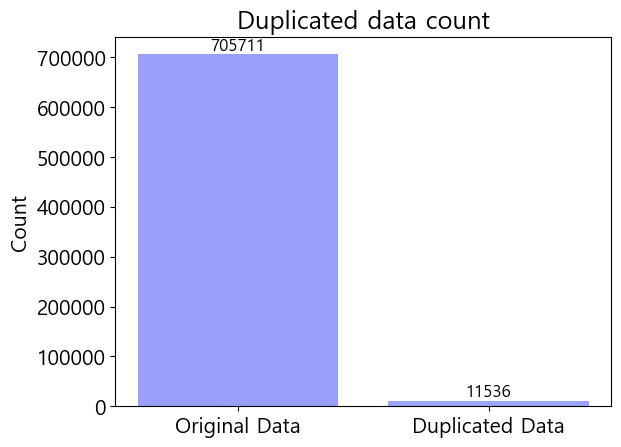

In [15]:
colors = sns.color_palette('winter', len(drop_data.columns))

duplicated = len(drop_data[drop_data.duplicated()].index)
original = len(drop_data.index)

bar = plt.bar(x=["Original Data", "Duplicated Data"], height=[original, duplicated], color=colors, alpha=0.4)
plt.title("Duplicated data count")
plt.ylabel("Count")
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12)
plt.show()


In [16]:
drop_dupl_data = drop_data.drop_duplicates(keep="first").reset_index(drop=True)
drop_dupl_data.tail()

,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,championId,championLevel,championPoints,lastPlayTime,championSeasonMilestone,churn
694170,SILVER,I,3,8,False,False,False,False,1742919750000,394,64,21,214339,1742751996000,1,0
694171,SILVER,I,3,8,False,False,False,False,1742919750000,394,350,12,103144,1739203071000,0,0
694172,PLATINUM,I,28,17,False,False,True,False,1743072633363,382,80,34,416320,1743147151000,7,0
694173,PLATINUM,I,28,17,False,False,True,False,1743072633363,382,28,29,330003,1742744548000,1,0
694174,PLATINUM,I,28,17,False,False,True,False,1743072633363,382,20,17,201140,1741358066000,1,0


### revisionDate 변환

In [17]:
rev_diff_data = []
lpt_diff_data = []

for revisionDate, lastPlayTime in zip(drop_dupl_data["revisionDate"], drop_dupl_data["lastPlayTime"]):
    rev_diff = datetime.now(timezone.utc) - datetime.fromtimestamp(revisionDate / 1000, tz=timezone.utc)
    lpt_diff = datetime.now(timezone.utc) - datetime.fromtimestamp(lastPlayTime / 1000, tz=timezone.utc)
    rev_diff_data.append(rev_diff.days)
    lpt_diff_data.append(lpt_diff.days)

rev_trans_data = drop_dupl_data.copy()
rev_trans_data["revisionDate"] = rev_diff_data
rev_trans_data["lastPlayTime"] = lpt_diff_data

rev_trans_data.tail()

,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,championId,championLevel,championPoints,lastPlayTime,championSeasonMilestone,churn
694170,SILVER,I,3,8,False,False,False,False,5,394,64,21,214339,7,1,0
694171,SILVER,I,3,8,False,False,False,False,5,394,350,12,103144,48,0,0
694172,PLATINUM,I,28,17,False,False,True,False,3,382,80,34,416320,2,7,0
694173,PLATINUM,I,28,17,False,False,True,False,3,382,28,29,330003,7,1,0
694174,PLATINUM,I,28,17,False,False,True,False,3,382,20,17,201140,23,1,0


In [41]:
# a = datetime.now(timezone.utc) - datetime.fromtimestamp(1698243784000 / 1000, tz=timezone.utc)
# print(a.days)

### winRate 변환

In [18]:
win_rate_data = rev_trans_data.copy()

win_rate_data['winRate'] = win_rate_data['wins'] / (win_rate_data['wins'] + win_rate_data['losses']) * 100

losses_index = win_rate_data.columns.get_loc("losses")

win_rate_data.insert(losses_index + 1, "winRate", win_rate_data.pop("winRate"))

win_rate_data = win_rate_data.drop(["wins", "losses"], axis=1)

win_rate_data.head()

,tier,rank,winRate,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,championId,championLevel,championPoints,lastPlayTime,championSeasonMilestone,churn
0,BRONZE,III,22.222222,False,False,False,False,41,38,64,5,29339,70,0,1
1,BRONZE,III,22.222222,False,False,False,False,41,38,76,5,28572,70,0,1
2,BRONZE,III,22.222222,False,False,False,False,41,38,92,5,24741,109,0,1
3,DIAMOND,IV,57.692308,False,False,False,False,3,181,81,20,196312,36,0,0
4,DIAMOND,IV,57.692308,False,False,False,False,3,181,145,20,190530,20,1,0


### veteran, inactive, freshBlood, hotStreak 데이터 분포 확인

veteran
False    692762
True       1413
Name: count, dtype: int64
inactive
False    694175
Name: count, dtype: int64
freshBlood
False    637361
True      56814
Name: count, dtype: int64
hotStreak
False    622859
True      71316
Name: count, dtype: int64


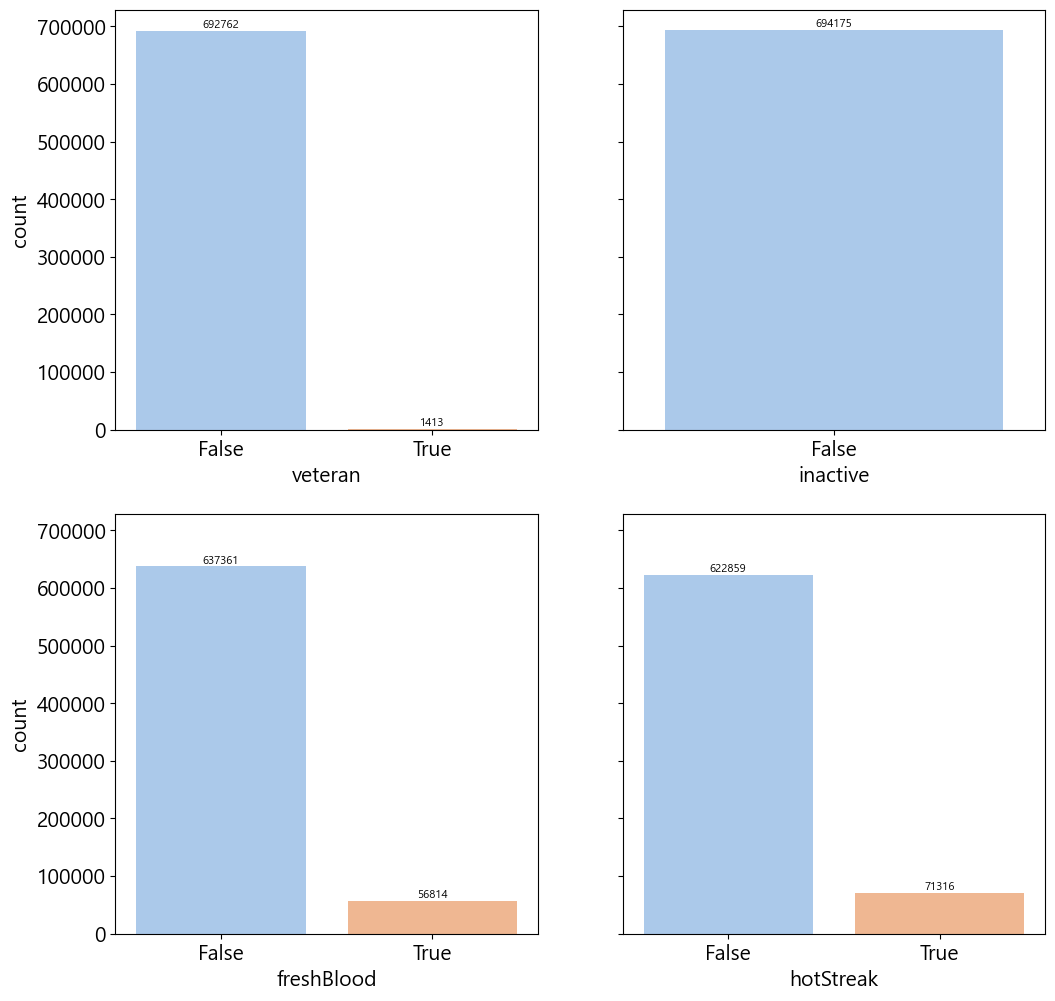

In [19]:
print(win_rate_data["veteran"].value_counts())
print(win_rate_data["inactive"].value_counts())
print(win_rate_data["freshBlood"].value_counts())
print(win_rate_data["hotStreak"].value_counts())

cols = ['veteran', 'inactive', 'freshBlood', 'hotStreak']

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

for ax, col in zip(axes.flatten(), cols):
    sns.countplot(data=win_rate_data, x=col, ax=ax, palette="pastel")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', 
                    va='bottom',
                    fontsize=8, 
                    color='black')
plt.show()

**inactive**는 False 값만 있기에 의미가 없어 제거

In [21]:
drop_inac_data = win_rate_data.drop(["inactive"], axis=1)
drop_inac_data

,tier,rank,winRate,veteran,freshBlood,hotStreak,revisionDate,summonerLevel,championId,championLevel,championPoints,lastPlayTime,championSeasonMilestone,churn
0,BRONZE,III,22.222222,False,False,False,41,38,64,5,29339,70,0,1
1,BRONZE,III,22.222222,False,False,False,41,38,76,5,28572,70,0,1
2,BRONZE,III,22.222222,False,False,False,41,38,92,5,24741,109,0,1
3,DIAMOND,IV,57.692308,False,False,False,3,181,81,20,196312,36,0,0
4,DIAMOND,IV,57.692308,False,False,False,3,181,145,20,190530,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694170,SILVER,I,27.272727,False,False,False,5,394,64,21,214339,7,1,0
694171,SILVER,I,27.272727,False,False,False,5,394,350,12,103144,48,0,0
694172,PLATINUM,I,62.222222,False,True,False,3,382,80,34,416320,2,7,0
694173,PLATINUM,I,62.222222,False,True,False,3,382,28,29,330003,7,1,0


### Label encoding 및 One hot encoding

In [22]:
le = LabelEncoder()

prep_data = drop_inac_data.copy()

cols = ['tier', 'rank', 'veteran', 'freshBlood', 'hotStreak']

for col in cols:
    prep_data[col] = le.fit_transform(drop_inac_data[col])
prep_data

,tier,rank,winRate,veteran,freshBlood,hotStreak,revisionDate,summonerLevel,championId,championLevel,championPoints,lastPlayTime,championSeasonMilestone,churn
0,0,2,22.222222,0,0,0,41,38,64,5,29339,70,0,1
1,0,2,22.222222,0,0,0,41,38,76,5,28572,70,0,1
2,0,2,22.222222,0,0,0,41,38,92,5,24741,109,0,1
3,2,3,57.692308,0,0,0,3,181,81,20,196312,36,0,0
4,2,3,57.692308,0,0,0,3,181,145,20,190530,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694170,9,0,27.272727,0,0,0,5,394,64,21,214339,7,1,0
694171,9,0,27.272727,0,0,0,5,394,350,12,103144,48,0,0
694172,8,0,62.222222,0,1,0,3,382,80,34,416320,2,7,0
694173,8,0,62.222222,0,1,0,3,382,28,29,330003,7,1,0


### 히트맵 분석

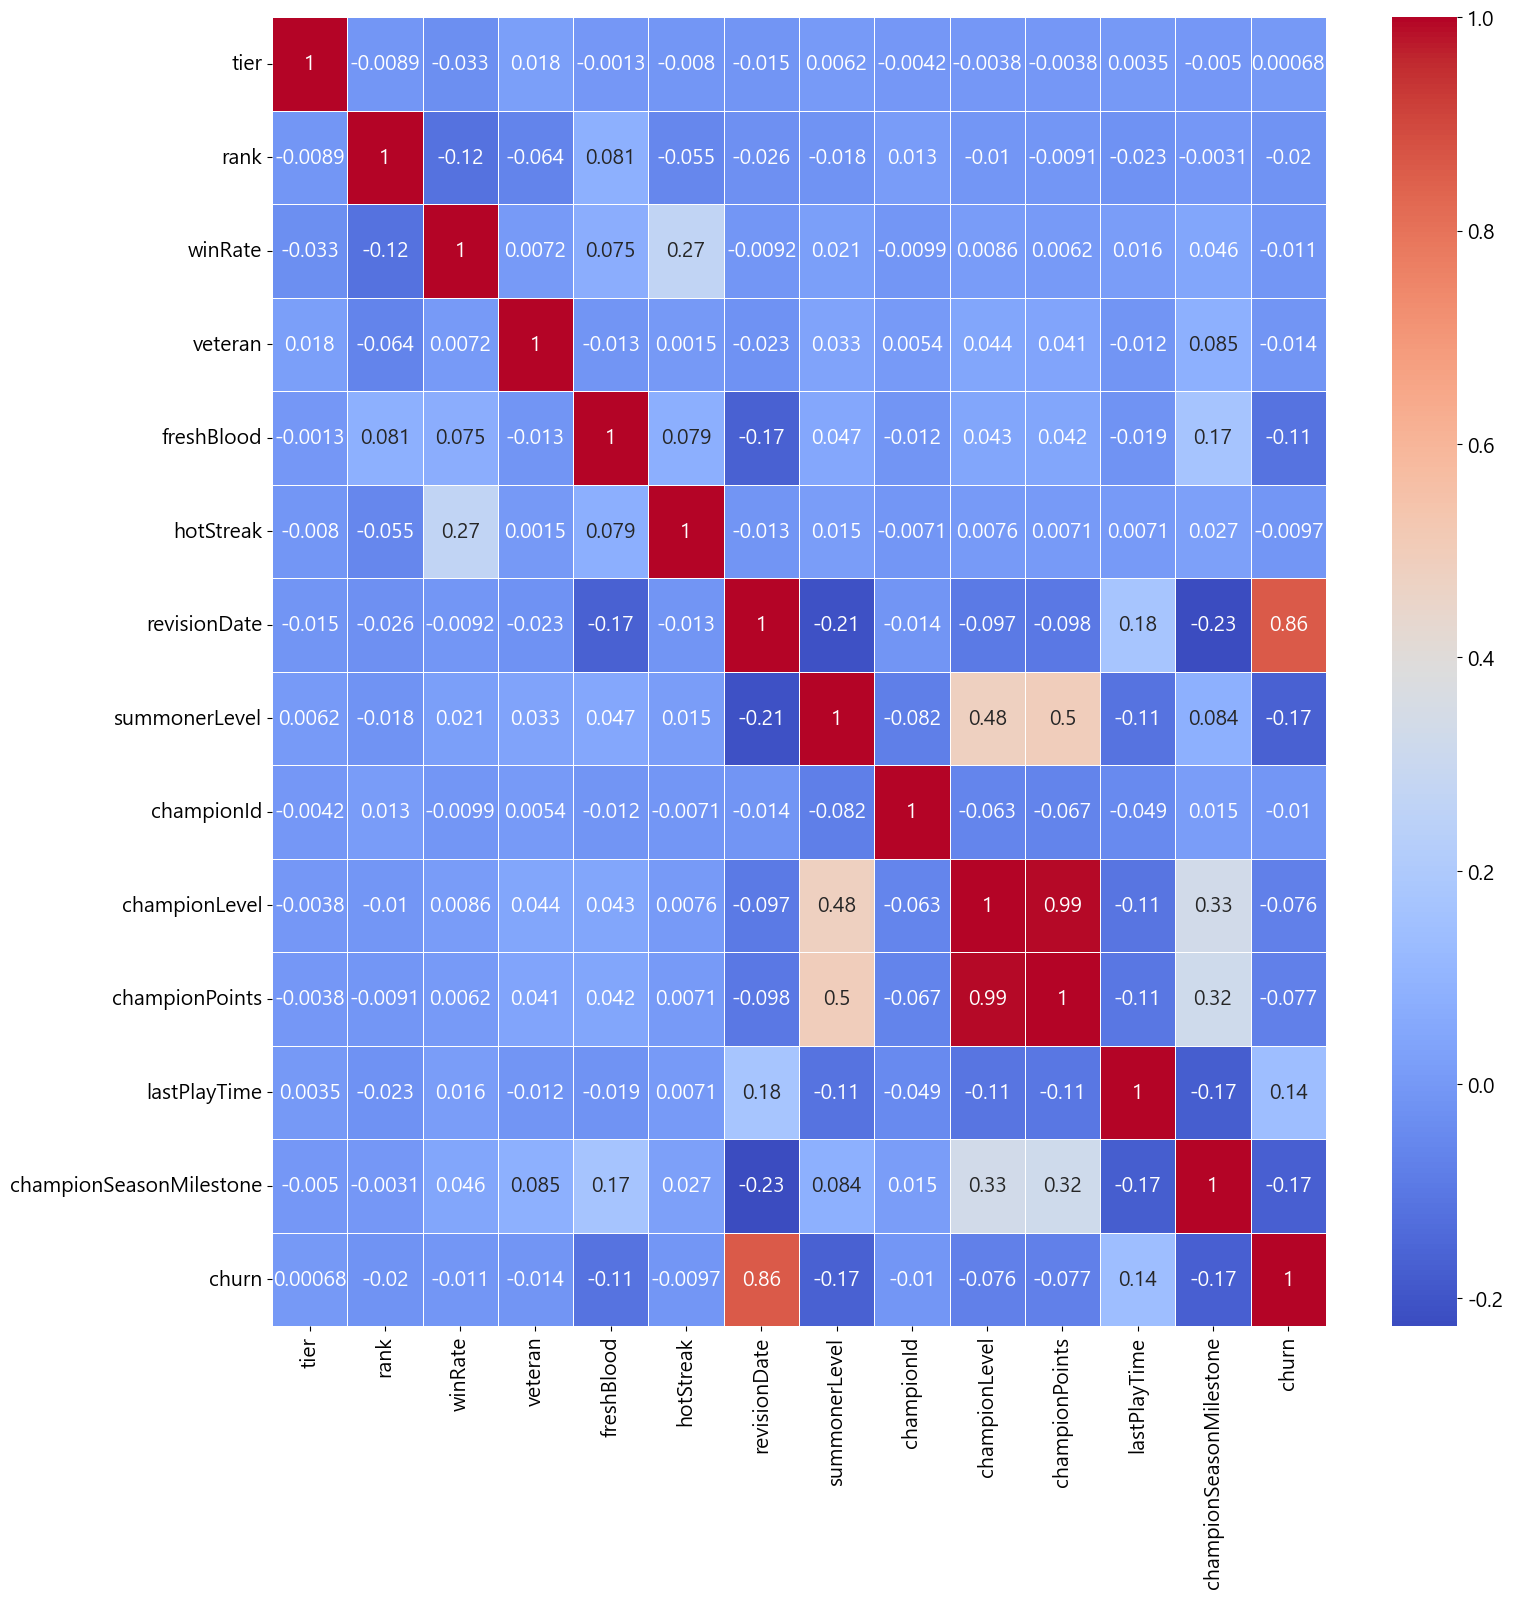

In [24]:
corr_matrix = prep_data.corr()
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### 불균형 데이터 샘플링

In [23]:
columns = ["veteran", "freshBlood", "hotStreak", "churn"]
oversampl_X_data = prep_data.copy()
smote = SMOTE(random_state=42)

for column in columns:
    oversampl_y_data = oversampl_X_data[column]
    oversampl_X_data = oversampl_X_data.drop(labels=column, axis=1)
    
    oversampl_X_data, oversampl_y_data = smote.fit_resample(oversampl_X_data, oversampl_y_data)
    oversampl_X_data = pd.concat([oversampl_X_data, oversampl_y_data], axis=1)

oversampl_data = oversampl_X_data

veteran
0    9017056
1     881250
Name: count, dtype: int64
freshBlood
0    7630392
1    2267914
Name: count, dtype: int64
hotStreak
0    5980483
1    3917823
Name: count, dtype: int64
churn
1    4949153
0    4949153
Name: count, dtype: int64


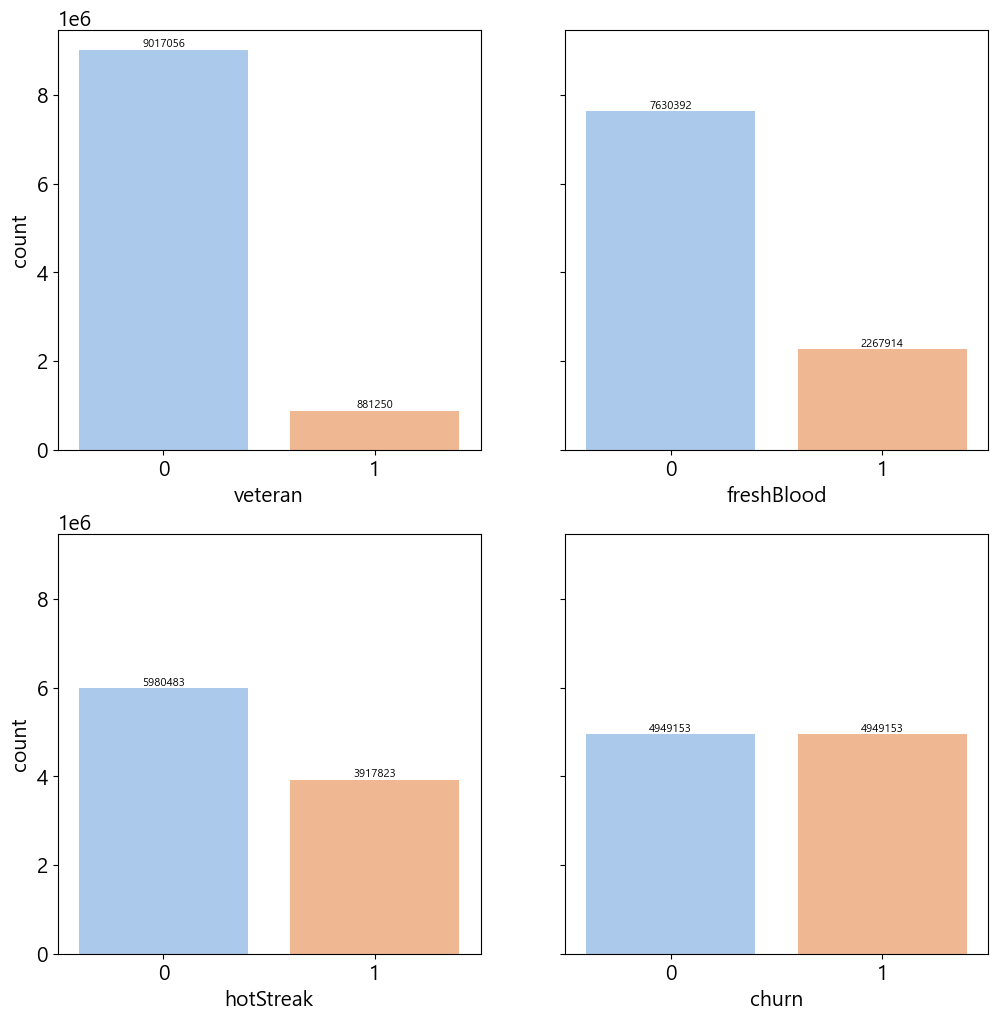

In [25]:
print(oversampl_data["veteran"].value_counts())
print(oversampl_data["freshBlood"].value_counts())
print(oversampl_data["hotStreak"].value_counts())
print(oversampl_data["churn"].value_counts())

cols = ['veteran', 'freshBlood', 'hotStreak', "churn"]

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

for ax, col in zip(axes.flatten(), cols):
    sns.countplot(data=oversampl_data, x=col, ax=ax, palette="pastel")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', 
                    va='bottom',
                    fontsize=8, 
                    color='black')
plt.show()

### Column 간의 관계 분석

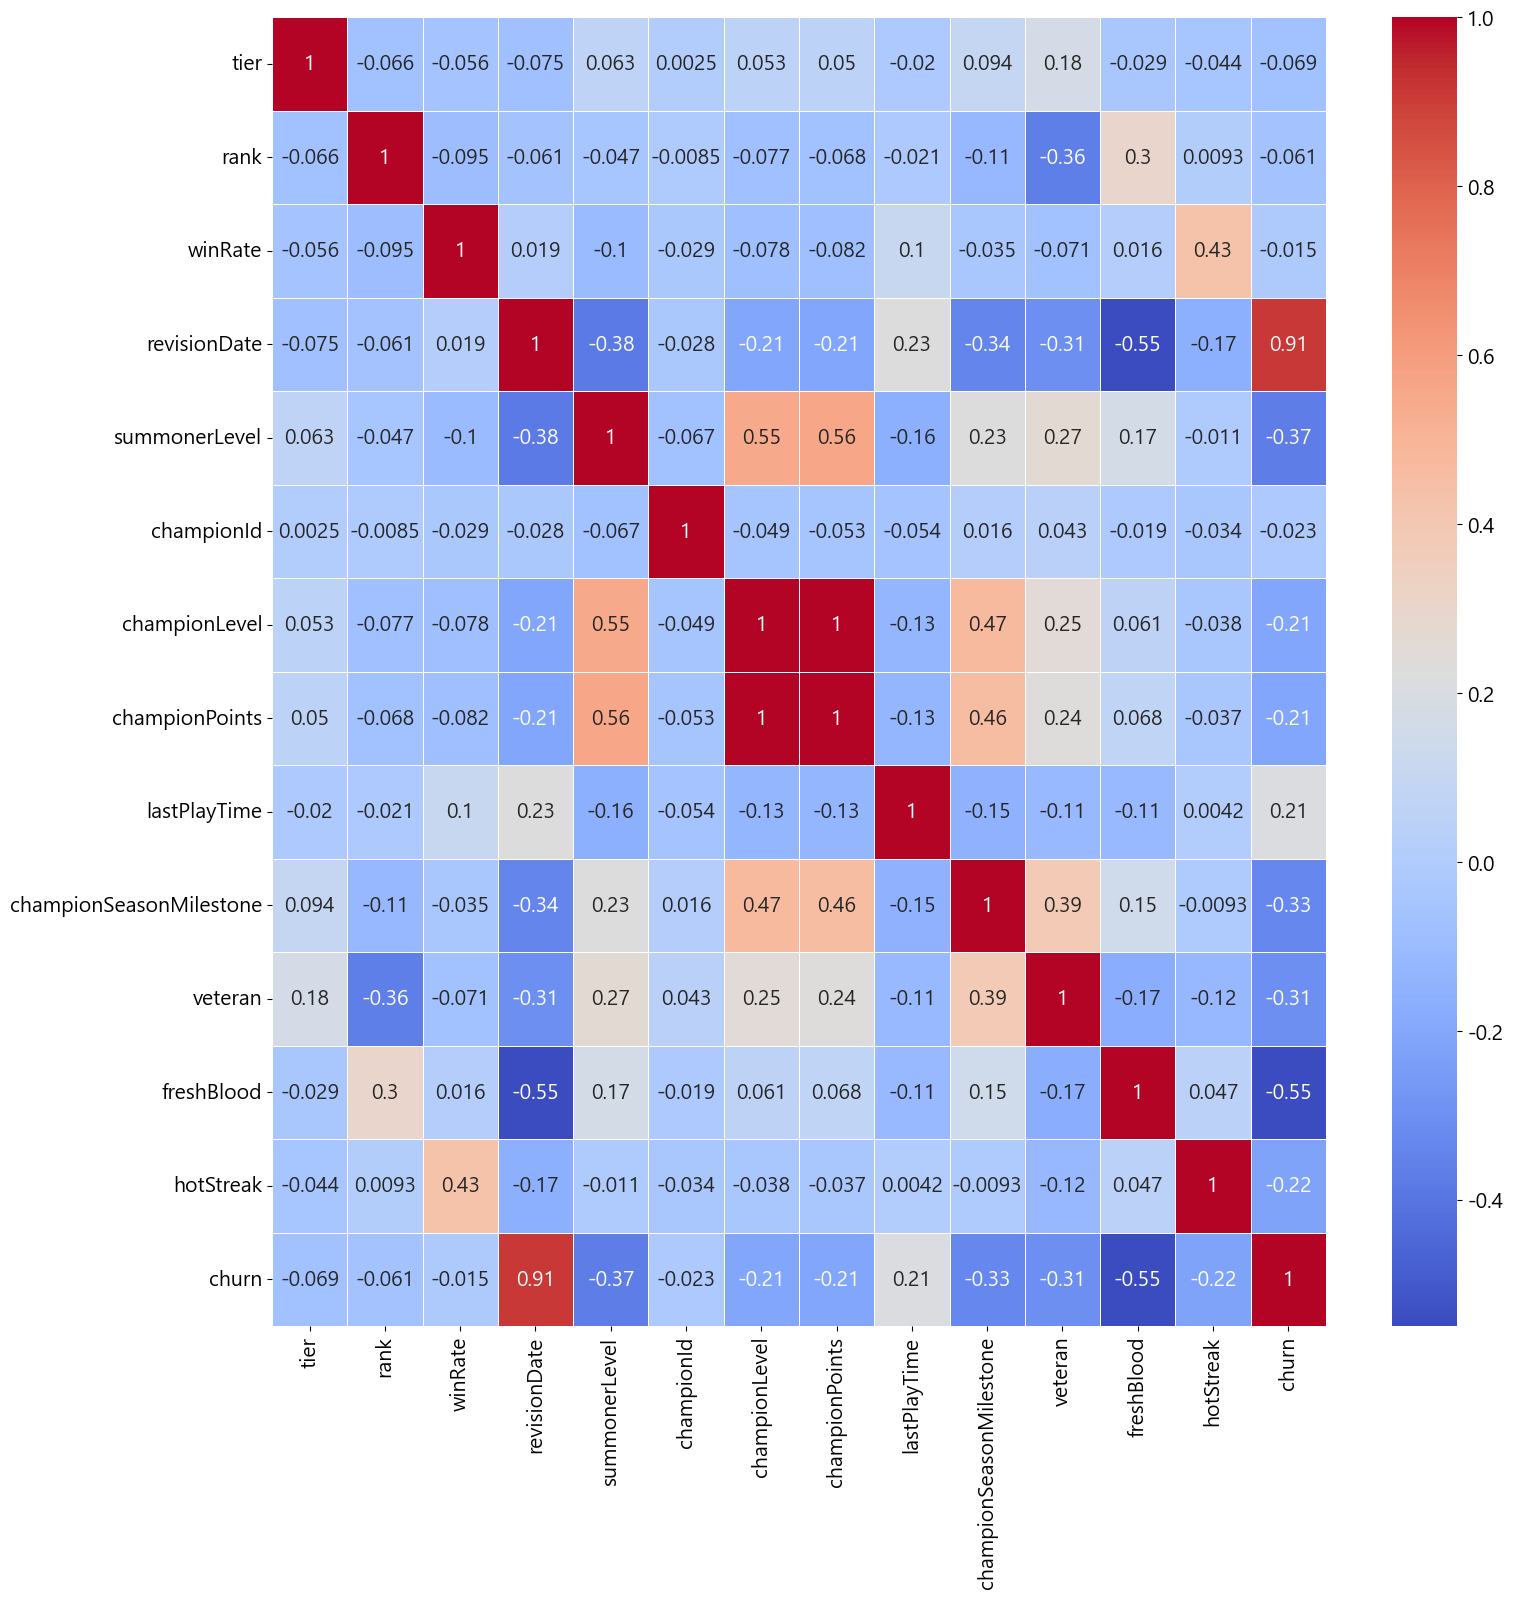

In [26]:
corr_matrix = oversampl_data.corr()
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()